In [1]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

np.set_printoptions(threshold=None)

from sklearn import preprocessing

plt.rc("font", size=14)

from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.datasets import make_classification
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)
from sklearn.preprocessing import OneHotEncoder

import scipy
import seaborn as sns

from sklearn import ensemble
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn import pipeline
from sklearn import cross_validation
from sklearn import metrics
from imblearn.over_sampling import SMOTE

/Users/pro/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
lang=pd.read_csv('lang_dat.csv',encoding='latin-1')
lang.head()



,text,language
0,Ship shape and Bristol fashion,English
1,Know the ropes,English
2,Graveyard shift,English
3,Milk of human kindness,English
4,Touch with a barge-pole - Wouldn't,English


In [3]:
lang.language.value_counts()

English       2077
Afrikaans      671
Nederlands      91
Name: language, dtype: int64

In [4]:
lang.isnull().values.sum()

85

In [5]:
lang=lang.dropna()

In [6]:
lang.isnull().values.sum()

0

In [7]:
lang.language.value_counts()

English       2055
Afrikaans      639
Nederlands      67
Name: language, dtype: int64

In [8]:
X=lang.text
y=lang.language

In [9]:
X.head()

0        Ship shape and Bristol fashion
1                        Know the ropes
2                       Graveyard shift
3                Milk of human kindness
4    Touch with a barge-pole - Wouldn't
Name: text, dtype: object

In [10]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: language, dtype: object

In [11]:
languages=['Afrikaans','English','Nederlands']

In [12]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,
                                                                     y,
                                                                     test_size=0.2,
                                                                     random_state=5)

# Random Forest

In [13]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 6),
                             analyzer='char',)
#                             use_idf=False)

pipe = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', RandomForestClassifier())
])

pipe.fit(X_train, y_train)

y_predicted = pipe.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predicted)

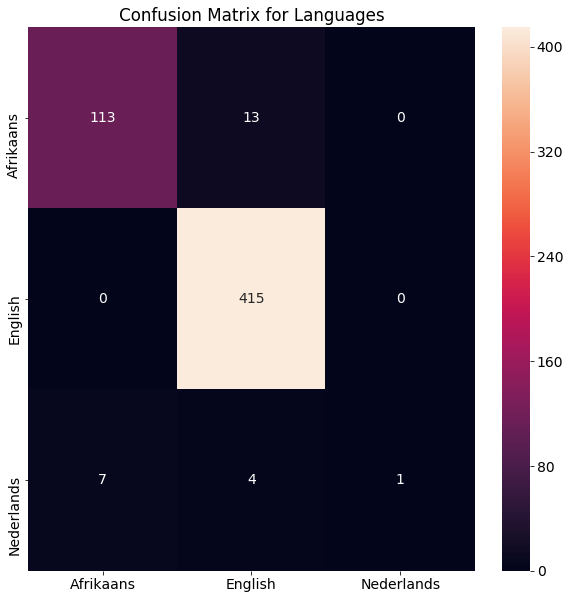

In [14]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,  fmt='', xticklabels=languages, yticklabels=languages);
plt.title('Confusion Matrix for Languages');

plt.show()

In [15]:
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=lang.language.unique()))

             precision    recall  f1-score   support

    English       0.94      0.90      0.92       126
  Afrikaans       0.96      1.00      0.98       415
 Nederlands       1.00      0.08      0.15        12

avg / total       0.96      0.96      0.95       553



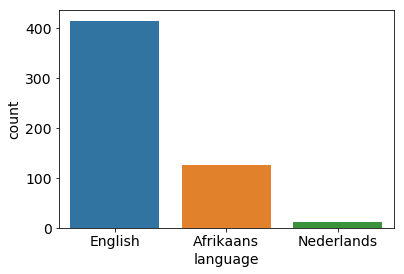

In [16]:
sns.countplot(y_test)
plt.show()

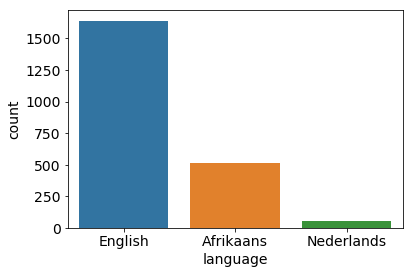

In [17]:
sns.countplot(y_train)
plt.show()


In [18]:
x_train, x_val, y_train, y_val = train_test_split(X, y,
                                                  test_size = .2,
                                                  random_state=0)

# Logistic Regression

In [19]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1, 6),
                             analyzer='char',)
#                             use_idf=False)

pipe = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', linear_model.LogisticRegression())
])


pipe.fit(x_train, y_train)



Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='char', binary=False, decode_error=u'strict',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 6), norm=u'l2', preprocessor=None, smooth_idf...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))])

In [20]:


y_predicted = pipe.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predicted)

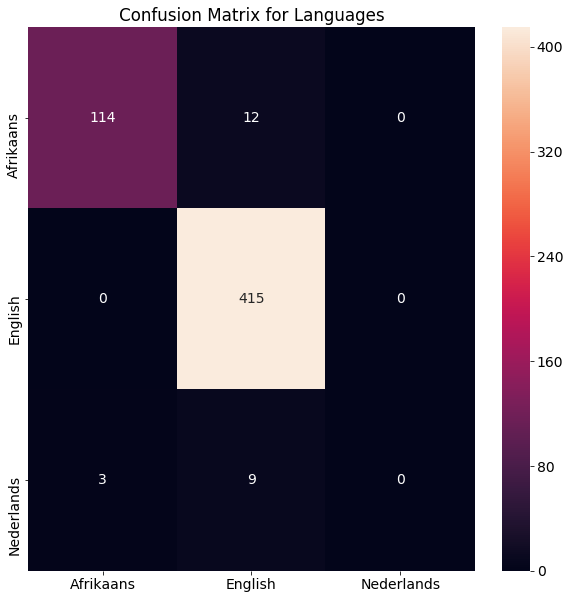

In [21]:
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,  fmt='', xticklabels=languages, yticklabels=languages);
plt.title('Confusion Matrix for Languages');

plt.show()

# Decision Tree

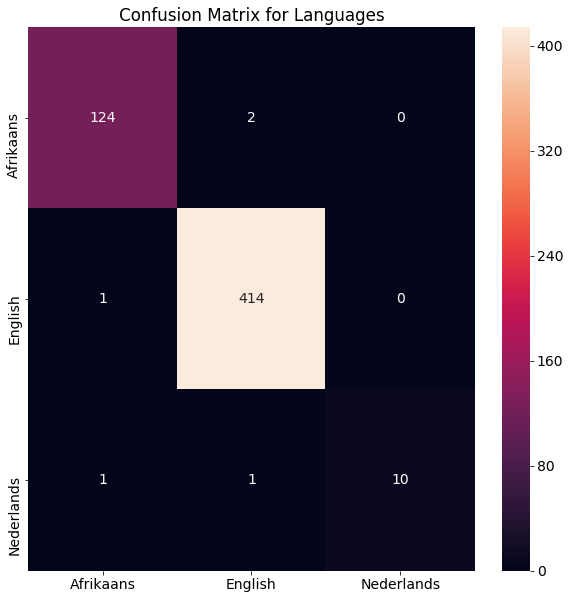

In [23]:
pipe = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', tree.DecisionTreeClassifier())
])


pipe.fit(x_train, y_train)

y_predicted = pipe.predict(X_test)

cm = metrics.confusion_matrix(y_test, y_predicted)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True,  fmt='', xticklabels=languages, yticklabels=languages);
plt.title('Confusion Matrix for Languages');

plt.show()

In [24]:
print(metrics.classification_report(y_test, y_predicted,
                                    target_names=lang.language.unique()))

             precision    recall  f1-score   support

    English       0.98      0.98      0.98       126
  Afrikaans       0.99      1.00      1.00       415
 Nederlands       1.00      0.83      0.91        12

avg / total       0.99      0.99      0.99       553

